Sales Prediction Using Python

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model  import LinearRegression
from sklearn import metrics
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")




Read the Dataset

In [2]:
df= pd.read_csv('SalesDataset.csv')

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


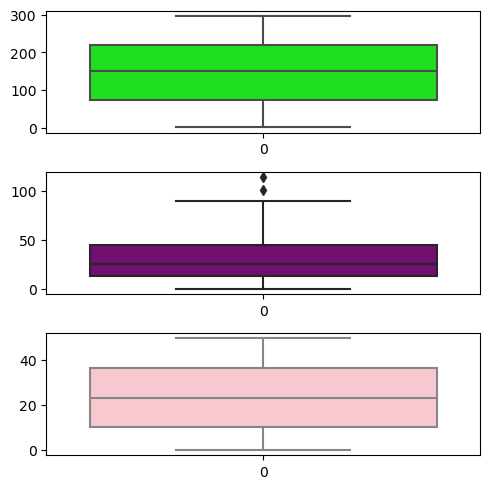

In [7]:
fig, axs=plt.subplots(3,figsize = (5,5))
plt1 = sns.boxplot(df['TV'],ax = axs[0],color ='lime')
plt2 = sns.boxplot(df['Newspaper'],ax = axs[1],color ='purple')
plt3 = sns.boxplot(df['Radio'], ax=axs[2], color='pink')
plt.tight_layout()

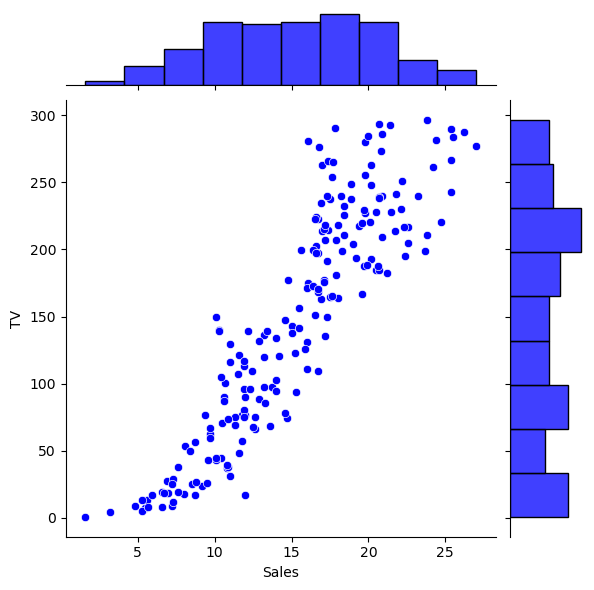

In [8]:
import seaborn as sns

sns.jointplot(x='Sales', y='TV', data=df, color='blue')


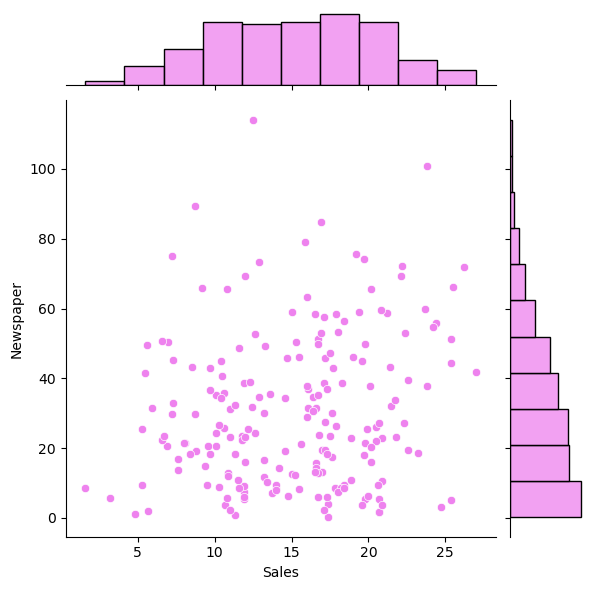

In [9]:
import seaborn as sns
sns.jointplot(x = 'Sales',y = 'Newspaper',data = df, color ='violet')

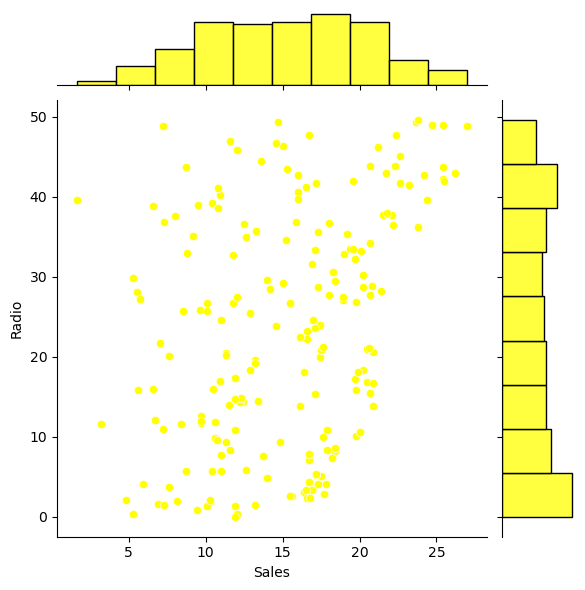

In [10]:
import seaborn as sns
sns.jointplot(x = 'Sales',y = 'Radio',data = df, color ='yellow')

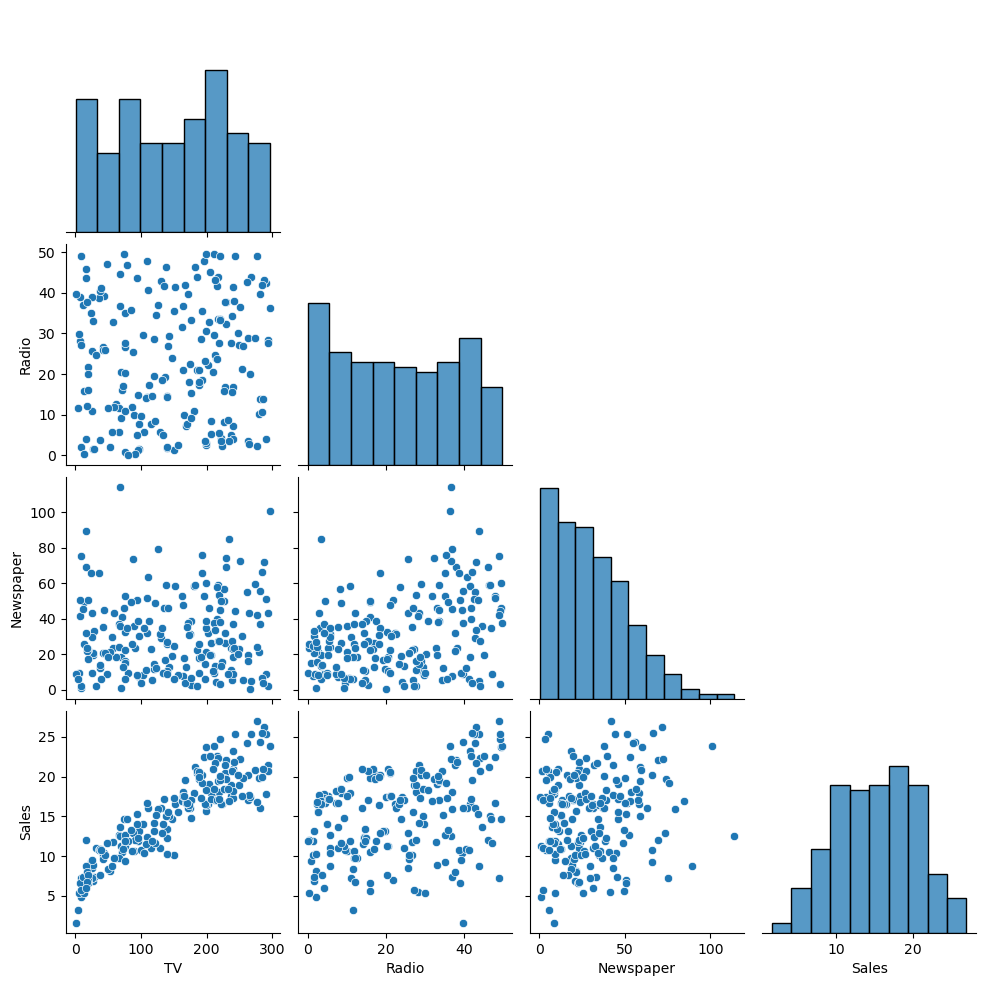

In [11]:
sns.pairplot(df,corner=True)

BUILDING ML MODEL (LINEAR REGRESSION)

In [12]:
x = df.drop('Sales', axis=1)

In [13]:
y = df['Sales']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.50,random_state = 105)

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(x_train, y_train)

LinearRegression()

In [17]:
prediction = lm.predict(x_test)

Analyze the model's performance

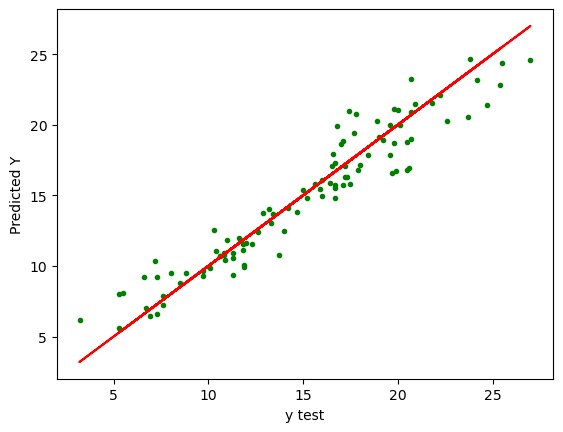

In [18]:
plt.scatter(y_test, prediction, c="g", marker=".")
plt.plot(y_test, y_test, c="r")
plt.ylabel('Predicted Y')
plt.xlabel('y test')
plt.show()

In [19]:
print("MAE:", metrics.mean_absolute_error(y_test,prediction))
print("MSE:", metrics.mean_squared_error(y_test,prediction))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 1.202674716611378
MSE: 2.5002261399891776
RMSE: 1.581210340210681


<Axes: xlabel='Sales', ylabel='Count'>

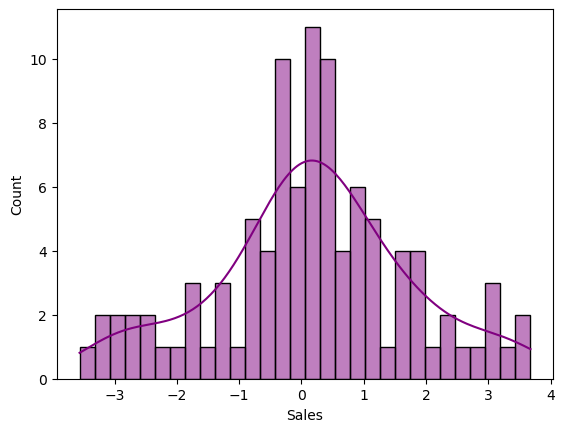

In [20]:
sns.histplot(y_test-prediction,bins=30,kde=True,color='purple')

In [21]:
coeff_df= pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.053613
Radio,0.098512
Newspaper,0.003989


In [22]:
metrics.explained_variance_score(y_test,prediction)

0.9122158090873246